In [128]:
import datetime, warnings, scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math #can create own custom layers in keras 
import tensorflow as tf
from keras.layers import Dense #standard neaaural network 
from keras.layers import LSTM #long short term memory layer, since looking at most likely sequential data 

from sklearn.preprocessing import MinMaxScaler, StandardScaler #for pre editing data 
from sklearn.metrics import mean_squared_error #to compute errors 

import warnings
warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv("airquality.csv", sep = ',')

In [106]:
df.head(5)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


# Descriptive Statistics

In [107]:
df.describe() #gives basic data analytics info looking for 

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [108]:
df['Ozone'] = df['Ozone'].fillna(42)

In [109]:
df.isnull().any()

Ozone      False
Solar.R     True
Wind       False
Temp       False
Month      False
Day        False
dtype: bool

In [110]:
df['Solar.R'] = df['Solar.R'].fillna(186)

In [111]:
df.isnull().any()

Ozone      False
Solar.R    False
Wind       False
Temp       False
Month      False
Day        False
dtype: bool

# Calculated Quantile for each Value 

In [130]:
def calculated_quantile(i, df):
    Q1 = df[[i]].quantile(0.25)[0]
    Q3 = df [[i]].quantile(0.75)[0]
    IQR = Q3 - Q1
    min = df[[i]].min()[0]
    max = df[[i]].max()[0]
    max_IQR = Q1 - 1.5 * IQR
    min_IQR = Q3 + 1.5 * IQR 
    
    return Q1, Q3, min, max, min_IQR, max_IQR
    

# Outliers

In [113]:
for i in df.columns:
    print('\nAttribute-', i, ':')
    Q1, Q3, min, max, min_IQR, max_IQR = calculated_quantile(i, df)
    print('Q1 = %.2f' % Q1)
    print('Q3 = %.2f' % Q3)
    
    print('min_IQR = %.2f' % min_IQR)
    print('max_IQR = % .2f' % max_IQR)
    


Attribute- Ozone :
Q1 = 21.00
Q3 = 46.00
min_IQR = 83.50
max_IQR = -16.50

Attribute- Solar.R :
Q1 = 120.00
Q3 = 256.00
min_IQR = 460.00
max_IQR = -84.00

Attribute- Wind :
Q1 = 7.40
Q3 = 11.50
min_IQR = 17.65
max_IQR =  1.25

Attribute- Temp :
Q1 = 72.00
Q3 = 85.00
min_IQR = 104.50
max_IQR =  52.50

Attribute- Month :
Q1 = 6.00
Q3 = 8.00
min_IQR = 11.00
max_IQR =  3.00

Attribute- Day :
Q1 = 8.00
Q3 = 23.00
min_IQR = 45.50
max_IQR = -14.50


# Log Tranformation to deal with Skewed Data

In [119]:
dataset = np.log1p(df[['Temp']].values) #domain specific 
dataset.shape

(153, 1)

In [121]:
#create new df to compare original to log transformation
dist_df = pd.DataFrame({'Temp':df['Temp'].values, 
                       'log_temp': dataset[:, 0]})

<Figure size 864x360 with 0 Axes>

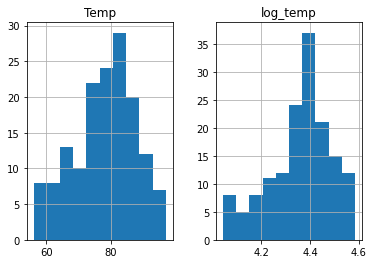

In [124]:
#create new histogram to plot original vs log transformation
plt.figure(figsize = (12,5))
dist_df.hist(); #integrates histogram right back into pandas

# Split the Data into Train & Test Data

In [127]:
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size #training size - length of the dataset 
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

114 39
